<a href="https://colab.research.google.com/github/bigbalo1/TestPythonskill/blob/main/MLPolyandLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective
Regression 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

In [113]:
import pandas as pd


In [114]:
import numpy as np


In [118]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [119]:
house = pd.read_csv("/content/kc_house_data (1).csv")
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

exploring individual column to differentiate numerical

In [ ]:
house["waterfront"].nunique()

2

In [ ]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [123]:
rel_ft = house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15','price']]

In [124]:
rel_ft

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


In [ ]:
rel_ft["price"].nunique()

4028

In [ ]:
rel_ft['sqft_lot'].nunique()

9782

In [122]:

rel_ft = house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15','price']].nunique()

rel_ft     

bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
price            4028
dtype: int64

price            4028 is numerical
bedrooms           13 is catigorical
bathrooms          30 is catigorical
sqft_living      1038 is numerical
sqft_lot         9782 is numerical
floors              6 is catigorical
waterfront          2 is catigorical
view                5 is catigorical
condition           5 is catigorical
grade              12 is catigorical
sqft_above        946 is numerical
sqft_basement     306 is numerical
yr_built          116 is numeriacal
yr_renovated       70 is catigoriacal
lat              5034 is numerical
long              752 is numerical
sqft_living15     777 is numerical
sqft_lot15       8689 is numerical

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

price            4028 is numerical
bedrooms           13 is catigorical
bathrooms          30 is catigorical
sqft_living      1038 is numerical
sqft_lot         9782 is numerical
floors              6 is catigorical
waterfront          2 is catigorical
view                5 is catigorical
condition           5 is catigorical
grade              12 is catigorical
sqft_above        946 is numerical
sqft_basement     306 is numerical
yr_built          116 is numerical
yr_renovated       70 is catigorical
lat              5034 is numerical
long              752 is numerical
sqft_living15     777 is numerical
sqft_lot15       8689 is numerical

In [125]:
x = house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = house['price']


In [126]:
rel_ft

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


In [127]:
rel_ft

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


In [128]:
sc = StandardScaler()
trans = sc.fit_transform(rel_ft)

In [129]:
trans_df = pd.DataFrame(trans)
trans_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,-0.866717
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,-0.005688
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,-0.980849
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,0.174090
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,-0.081958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381,-0.490545
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946,-0.381588
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141,-0.375865
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511,-0.381588


In [130]:
x= trans_df.iloc[:, :-1]
y = trans_df.iloc[:, -1]

y

0       -0.866717
1       -0.005688
2       -0.980849
3        0.174090
4       -0.081958
           ...   
21608   -0.490545
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: 17, Length: 21613, dtype: float64

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2)

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

building our model

In [133]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

target = linear_model.predict(x_test)

In [134]:
target

array([ 0.93216395,  2.15113288, -0.89286373, ..., -0.32579097,
        0.46962751,  0.54007832])

In [149]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.36849628599070117
0.678788404398637


# Simple Linear Regression section

In [63]:
x_sqft = trans_df.iloc[:,2]
y_sqft = trans_df.iloc[:,-1]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_sqft, y_sqft, test_size= .2)

In [69]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [70]:
linemodel = LinearRegression()
linemodel.fit(x_train, y_train)

target = linemodel.predict(x_test)

In [71]:
target

array([ 0.43719803,  0.63893806, -0.41631752, ...,  0.01819949,
       -0.0749113 , -0.91290838])

In [72]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.4990244426303208
0.4703178935709865


In [24]:
trans

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.9433552 ,
        -0.26071541, -0.86671733],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.43268619,
        -0.18786773, -0.00568792],
       [-1.47395936, -1.44746357, -1.42625404, ...,  1.07013975,
        -0.17237524, -0.98084935],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.39414129, -0.37586519],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.8412214 ,
        -0.42051149, -0.38158814],
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.41794772, -0.58588173]])

In [182]:
x

array([[-1.44746357, -0.97983502, -0.22832133, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [ 0.1756067 ,  0.53363434, -0.18988538, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.44746357, -1.42625404, -0.12329847, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.77207762, -1.15404732, -0.33213703, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [ 0.50022075, -0.52252773, -0.30707641, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.77207762, -1.15404732, -0.33875227, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [183]:
y

array([-0.86671733, -0.00568792, -0.98084935, ..., -0.37586519,
       -0.38158814, -0.58588173])

In [184]:
x = np.array(x)
y = np.array(y)

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2)

In [186]:
len(y_train)

17290

In [187]:
len(x_train)

17290

# Polynomial Regression


squr Living

In [260]:
x_sqft = trans_df.iloc[:,2]
y_sqft = trans_df.iloc[:,-1]

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x_sqft, y_sqft, test_size= .2)

In [279]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [280]:
linemodel = LinearRegression()
linemodel.fit(x_train, y_train)

target = linemodel.predict(x_test)

In [281]:
target

array([[ 0.06757066],
       [-0.07563537],
       [ 0.31629692],
       ...,
       [-0.60323653],
       [ 0.67054341],
       [ 0.48965158]])

In [282]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.544336244053042
0.5069218589099342


In [283]:
from sklearn.linear_model import LinearRegression
lin_rag = LinearRegression()

In [284]:
lin_rag.fit(x_train, y_train)

LinearRegression()

In [286]:
print('intercept costant for our linear model: ', lin_rag.intercept_)
print('coefficient of x for linear model: ', lin_rag.coef_)

intercept costant for our linear model:  [-0.00033935]
coefficient of x for linear model:  [[0.69222753]]


In [287]:
y_pred = lin_rag.predict(x_test)

In [288]:
import matplotlib.pyplot as plt


In [258]:
len(x_test) == len(y_pred)

True

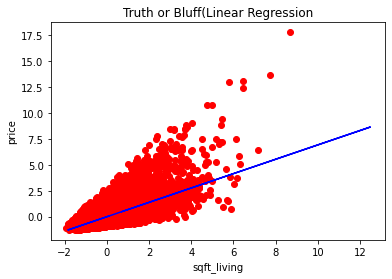

In [289]:
plt.scatter(x_train, y_train,color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Truth or Bluff(Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [268]:
from sklearn.preprocessing import PolynomialFeatures
poly_rag = PolynomialFeatures(degree = 4)

In [275]:
x_poly = poly_rag.fit_transform(x_test)
lin_rag_2 = LinearRegression()
lin_rag_2.fit(x_poly, y_test)

LinearRegression()

In [276]:
y_poly_pred =lin_rag_2.predict(x_poly)
y_poly_pred

array([[ 0.06918382],
       [-0.56208694],
       [-0.27162874],
       ...,
       [ 0.22189136],
       [-0.43174036],
       [ 1.63037437]])

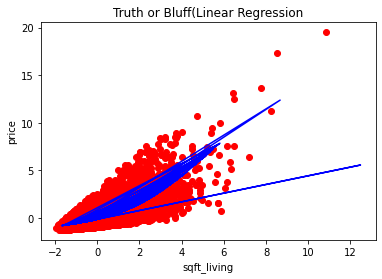

In [277]:
plt.scatter(x_train,y_train, color = 'red')
#plt.plot(x, lin_rag_2.predict(poly_rag.fit_transform(x)), color = 'blue')
plt.plot(x_test, y_poly_pred, color = 'blue')
plt.title('Truth or Bluff(Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

**Floor**

In [290]:
x_floor = trans_df.iloc[:,5]
y_floor = trans_df.iloc[:,-1]

In [292]:
x_train_floor, x_test_floor, y_train_floor, y_test_floor = train_test_split(x_floor, y_floor, test_size= .2)

In [294]:
x_train_floor = np.array(x_train_floor).reshape(-1,1)
x_test_floor = np.array(x_test_floor).reshape(-1,1)
y_train_floor = np.array(y_train_floor).reshape(-1,1)
y_test_floor = np.array(y_test_floor).reshape(-1,1)

In [295]:
linemodel = LinearRegression()
linemodel.fit(x_train_floor, y_train_floor)

target = linemodel.predict(x_test_floor)

In [296]:
target

array([[-0.01942455],
       [-0.01942455],
       [-0.01942455],
       ...,
       [-0.01942455],
       [-0.01942455],
       [-0.01942455]])

In [297]:
print(mean_squared_error(y_test_floor, target))
print(metrics.r2_score(y_test_floor, target))

0.8057077307837013
0.04958735734766917


In [298]:
lin_rag.fit(x_train_floor, y_train_floor)

LinearRegression()

In [299]:
print('intercept costant for our linear model: ', lin_rag.intercept_)
print('coefficient of x for linear model: ', lin_rag.coef_)

intercept costant for our linear model:  [0.00466798]
coefficient of x for linear model:  [[0.2763772]]


In [300]:
y_pred = lin_rag.predict(x_test_floor)

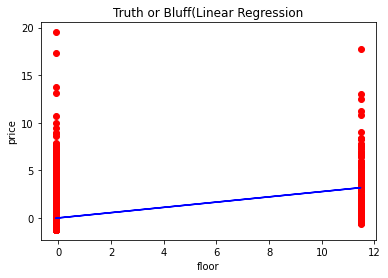

In [301]:
plt.scatter(x_train_floor, y_train_floor,color = 'red')
plt.plot(x_test_floor, y_pred, color = 'blue')
plt.title('Truth or Bluff(Linear Regression')
plt.xlabel('floor')
plt.ylabel('price')
plt.show()

visualising the polynomial regression result

In [303]:
x_poly1 = poly_rag.fit_transform(x_test_floor)
lin_rag_2 = LinearRegression()
lin_rag_2.fit(x_poly, y_test_floor)

LinearRegression()

In [304]:
y_poly_pred1 =lin_rag_2.predict(x_poly1)
y_poly_pred1

array([[-0.03867981],
       [-0.03867981],
       [-0.03867981],
       ...,
       [-0.03867981],
       [-0.03867981],
       [-0.03867981]])

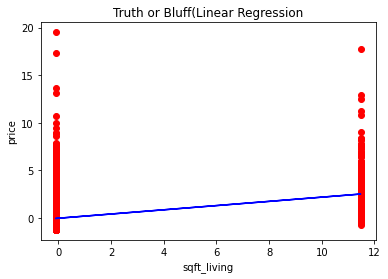

In [305]:
plt.scatter(x_train_floor,y_train_floor, color = 'red')
#plt.plot(x, lin_rag_2.predict(poly_rag.fit_transform(x)), color = 'blue')
plt.plot(x_test_floor, y_poly_pred1, color = 'blue')
plt.title('Truth or Bluff(Linear Regression')
plt.xlabel('floor')
plt.ylabel('price')
plt.show()

In [215]:
len(x_test)

4323

In [216]:
len(y_test)

4323